<h1 id="exercises">Exercises</h1>
<p>Within your <code>codeup-data-science</code> directory, create a new directory named <code>clustering-exercises</code>. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.</p>
<p>Save your clustering work in your <code>clustering-exercises</code> repo. Then add, commit, and push your changes.</p>
<p>For example, if the
exercise directs you to create a file named <code>myfile.py</code>, you should have
<code>clustering/myfile.py</code> in your repository.</p>
<p>If a file extension is specified, you should create that specific file. If there
is not file extension specified, you may either create a python script or a
jupyter notebook for the exercise.</p>
<div class="admonition tip">
<p class="admonition-title">Workflow</p>
<p>Throughout the exercises, you may wish to do your work in a notebook, then
transfer any functions you've created to an external python script.</p>
<p>Keep in mind this is not always a linear process! You will probably be
cycling between a notebook and an external python script frequently.</p>
<p>Remember to run your code often to check for correct output and/or errors.</p>
</div>


---


<h2 id="acquire-acquirepy">Acquire (acquire.py)</h2>
<h3 id="zillow">Zillow</h3>
<p>For the following, iterate through the steps you would take to create functions:
Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions. </p>
<p>You will have a zillow.ipynb file and a helper file for each section in the pipeline. </p>
<h4 id="acquire-summarize_1">acquire &amp; summarize</h4>



<ol>
<li>
<p>Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. </p>
<ul>
<li><strong><em>Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for <code>airconditioningtypeid</code>.</em></strong>  </li>
<li>Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  </li>
<li>Only include properties that include a latitude and longitude value.  </li>
</ul>
</li>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import env

#import wrangle_zillow

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

In [3]:
def get_connection(database):
    '''
    Database: string; name of database that the url is being created for
    '''
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{database}'

In [4]:
sql_query = '''
SELECT prop.*, logerror, transactiondate, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, propertylandusedesc, storydesc, typeconstructiondesc
FROM properties_2017 as prop 
INNER JOIN (
	SELECT id, p.parcelid, logerror, transactiondate
	FROM predictions_2017 AS p
	INNER JOIN (
		SELECT parcelid,  MAX(transactiondate) AS max_date
		FROM predictions_2017 
		GROUP BY (parcelid)) AS sub
			ON p.parcelid = sub.parcelid
		WHERE p.transactiondate = sub.max_date
		) AS subq
	ON prop.parcelid = subq.parcelid
LEFT JOIN airconditioningtype
	ON prop.airconditioningtypeid = airconditioningtype.airconditioningtypeid
LEFT JOIN architecturalstyletype
	ON prop.architecturalstyletypeid = architecturalstyletype.architecturalstyletypeid
LEFT JOIN buildingclasstype 
	ON prop.buildingclasstypeid = buildingclasstype.buildingclasstypeid
LEFT JOIN heatingorsystemtype
	ON prop.heatingorsystemtypeid = heatingorsystemtype.heatingorsystemtypeid
LEFT JOIN propertylandusetype
	ON prop.propertylandusetypeid = propertylandusetype.propertylandusetypeid
LEFT JOIN storytype
	ON prop.storytypeid = storytype.storytypeid
LEFT JOIN typeconstructiontype
	ON prop.typeconstructiontypeid = typeconstructiontype.typeconstructiontypeid
WHERE latitude IS NOT NULL 
	AND longitude IS NOT NULL
	AND transactiondate BETWEEN '2017-01-01' AND '2017-12-31';
'''

In [5]:
sqlquery2='''
SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 

FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
                          logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL
'''

In [6]:
def acquire_cache_zillow():
    url = get_connection('zillow')
    zillow = pd.read_sql(sql_query, url)
    zillow.to_csv('zillow.csv')
    zillow = pd.read_csv('zillow.csv')
    zillow.drop(columns=['Unnamed: 0'], inplace=True)
    return zillow

In [7]:
def acquire_cache_zillow2():
    url = get_connection('zillow')
    zillow2 = pd.read_sql(sqlquery2, url)
    zillow2.to_csv('zillow2.csv')
    zillow2 = pd.read_csv('zillow2.csv')
    zillow2.drop(columns=['Unnamed: 0'], inplace=True)
    return zillow2

In [8]:
#zillow = acquire_cache_zillow()

In [8]:
#Acquire data- commented out - just use saved CSV
#zillow2 = acquire_cache_zillow2()

In [222]:
df = pd.read_csv('zillow2.csv')

In [223]:
#print(zillow.shape)
print(df.shape)

(77575, 69)


In [224]:
df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,...,60590630072012.00,0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,...,61110010023006.00,0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,...,60590218022012.00,0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,...,60373001001006.00,-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,...,60371236012000.00,0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)</p>



In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,77575.00,1495352.00,860970.27,349.00,752105.00,1498195.00,2240715.00,2982274.00
parcelid,77575.00,13006298.98,3478020.75,10711855.00,11538198.00,12530531.00,14211235.50,167689317.00
airconditioningtypeid,25006.00,1.81,2.97,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,206.00,7.39,2.73,2.00,7.00,7.00,7.00,21.00
basementsqft,50.00,679.72,689.70,38.00,273.00,515.00,796.50,3560.00
...,...,...,...,...,...,...,...,...
landtaxvaluedollarcnt,77573.00,301145.30,492728.73,161.00,85293.00,203174.00,366753.00,48952198.00
taxamount,77570.00,5995.82,7628.87,19.92,2712.63,4448.26,6926.78,586639.30
taxdelinquencyyear,2900.00,14.09,2.18,3.00,14.00,15.00,15.00,99.00
censustractandblock,77328.00,60496658430265.16,1533375678743.79,60371011101000.00,60373109004005.00,60376032001020.00,60590423251007.00,483030105084015.00


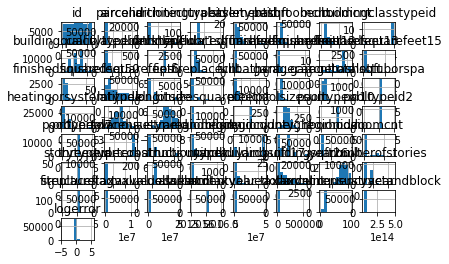

In [12]:
df.hist();


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77575 non-null  int64  
 1   parcelid                      77575 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77575 non-null  float64
 6   bedroomcnt                    77575 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76960 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77375 non-null  float64
 13  f

In [14]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [15]:
shape1 = df.shape

In [16]:
# How many nulls have in each column?

df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52569
architecturalstyletypeid    77369
basementsqft                77525
                            ...  
buildingclassdesc           77560
heatingorsystemdesc         28005
propertylandusedesc             0
storydesc                   77525
typeconstructiondesc        77353
Length: 68, dtype: int64

In [28]:
# % values missing in each column

missing_pct = df.isnull().sum()/len(df)*100
missing_pct.sort_values(missing_pct[1], ascending=False).head(51)

buildingclassdesc              99.98
buildingclasstypeid            99.98
finishedsquarefeet13           99.95
storytypeid                    99.94
basementsqft                   99.94
storydesc                      99.94
yardbuildingsqft26             99.91
fireplaceflag                  99.78
architecturalstyletypeid       99.73
architecturalstyledesc         99.73
typeconstructiondesc           99.71
typeconstructiontypeid         99.71
finishedsquarefeet6            99.50
pooltypeid10                   99.40
decktypeid                     99.21
poolsizesum                    98.88
pooltypeid2                    98.62
hashottuborspa                 98.02
yardbuildingsqft17             96.92
taxdelinquencyyear             96.26
taxdelinquencyflag             96.26
finishedsquarefeet15           96.10
finishedsquarefeet50           92.22
finishedfloor1squarefeet       92.22
fireplacecnt                   89.32
threequarterbathnbr            86.97
pooltypeid7                    80.56
p

In [38]:
# Percent complete rach column

complete = (100 - (df.isnull().sum()/len(df)*100))
complete

id                         100.00
parcelid                   100.00
airconditioningtypeid       32.23
architecturalstyletypeid     0.27
basementsqft                 0.06
                            ...  
buildingclassdesc            0.02
heatingorsystemdesc         63.90
propertylandusedesc        100.00
storydesc                    0.06
typeconstructiondesc         0.29
Length: 68, dtype: float64

In [39]:
# How many nulls have in each row?

df.isnull().sum(axis =1).value_counts()

33    14817
34    13357
32    12606
31     9911
36     5793
29     5285
35     5163
37     3630
30     3465
38     1932
28      457
27      316
39      285
40      230
44       79
26       65
45       50
43       29
41       29
42       26
25       24
24       13
46        5
48        3
47        3
23        2
dtype: int64

In [40]:
columns = df.columns.to_list()


In [41]:
for col in columns:
    print(col.upper())
    print('\n')
    print(df[col].value_counts())
    print('\n')

ID


709378     3
1968735    3
2353255    2
1169331    2
2600018    2
          ..
1318130    1
2188978    1
1584716    1
1487496    1
1187175    1
Name: id, Length: 77381, dtype: int64


PARCELID


12612211    3
11991059    3
14254548    2
12099888    2
11921077    2
           ..
11994786    1
14187514    1
11446758    1
14013599    1
12826780    1
Name: parcelid, Length: 77381, dtype: int64


AIRCONDITIONINGTYPEID


1.00     23185
13.00     1575
5.00       167
11.00       53
9.00        26
Name: airconditioningtypeid, dtype: int64


ARCHITECTURALSTYLETYPEID


7.00     172
8.00      19
21.00      7
2.00       5
3.00       3
Name: architecturalstyletypeid, dtype: int64


BASEMENTSQFT


900.00     2
700.00     2
100.00     2
640.00     2
515.00     2
273.00     2
912.00     2
314.00     1
819.00     1
1809.00    1
604.00     1
126.00     1
588.00     1
786.00     1
669.00     1
800.00     1
396.00     1
112.00     1
645.00     1
384.00     1
1969.00    1
252.00     1
600.00     1
1218.

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 




<table>
<thead>
<tr>
<th></th>
<th align="right">num_rows_missing</th>
<th align="right">pct_rows_missing</th>
</tr>
</thead>
<tbody>
<tr>
<td>parcelid</td>
<td align="right">0</td>
<td align="right">0.000000</td>
</tr>
<tr>
<td>airconditioningtypeid</td>
<td align="right">29041</td>
<td align="right">0.535486</td>
</tr>
<tr>
<td>architecturalstyletypeid</td>
<td align="right">54232</td>
<td align="right">0.999982</td>
</tr>
</tbody>
</table>



In [42]:
def describe_missing(df):
    columns = df.columns.to_list()
    num_rows_missing = []
    pct_rows_missing = []
    null_df = pd.DataFrame()
    for column in columns:
        num_rows_missing.append(df[column].isna().sum())
        pct_rows_missing.append(df[column].isna().sum()/df[column].shape[0]*100)
    null_df['attribute'] = columns
    null_df['num_rows_missing'] = num_rows_missing
    null_df['pct_rows_missing'] = pct_rows_missing
    return null_df

In [48]:
describe_missing(df).sort_values(by=['pct_rows_missing'], ascending=False).head(51)


,attribute,num_rows_missing,pct_rows_missing
63,buildingclassdesc,77560,99.98
7,buildingclasstypeid,77560,99.98
14,finishedsquarefeet13,77533,99.95
42,storytypeid,77525,99.94
4,basementsqft,77525,99.94
...,...,...,...
12,calculatedfinishedsquarefeet,200,0.26
51,structuretaxvaluedollarcnt,115,0.15
40,regionidzip,50,0.06
55,taxamount,5,0.01


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values. 




<table>
<thead>
<tr>
<th>num_cols_missing</th>
<th align="right">pct_cols_missing</th>
<th align="right">num_rows</th>
</tr>
</thead>
<tbody>
<tr>
<td>23</td>
<td align="right">38.333</td>
<td align="right">108</td>
</tr>
<tr>
<td>24</td>
<td align="right">40.000</td>
<td align="right">123</td>
</tr>
<tr>
<td>25</td>
<td align="right">41.667</td>
<td align="right">5280</td>
</tr>
</tbody>
</table>


In [51]:
def missing_columns(df):
    columns = df.columns.to_list()
    nulls_by_row = []
    for i in range(df.shape[0]):
        nulls_by_row.append(df.iloc[i].isna().sum())
    df['null_count'] = nulls_by_row
    df['pct_col_missing'] = df.null_count / len(columns)
    df2 = df.pct_col_missing.value_counts().rename_axis('pct_col_missing').reset_index(name='num_rows')
    df3 = df.null_count.value_counts().rename_axis('num_cols_missing').reset_index(name='num_rows').drop(columns=['num_rows'])
    df = pd.concat([df3, df2], axis = 1)
    return df     

In [57]:
missing_columns(df).sort_values(by=['num_cols_missing'], ascending=False).head(100)

,num_cols_missing,pct_col_missing,num_rows
23,48,0.69,3
24,47,0.67,3
22,46,0.66,5
16,45,0.64,50
14,44,0.63,79
...,...,...,...
11,27,0.39,316
15,26,0.37,65
20,25,0.36,24
21,24,0.34,13



<h4 id="prepare">Prepare</h4>
<ol>
<li>
<p>Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.  </p>




In [58]:
df.propertylandusedesc.isna().sum()


0

In [59]:
df.propertylandusedesc.value_counts()


Single Family Residential                     52439
Condominium                                   19341
Duplex (2 Units, Any Combination)              2021
Planned Unit Development                       1947
Quadruplex (4 Units, Any Combination)           729
Triplex (3 Units, Any Combination)              539
Cluster Home                                    335
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       59
Residential General                              41
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [60]:
df = df[
    (df.propertylandusedesc == 'Single Family Residential')|
    (df.propertylandusedesc == 'Condominium')|
    (df.propertylandusedesc == 'Planned Unit Development')|
    (df.propertylandusedesc == 'Mobile Home')|
    (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes')|
    (df.propertylandusedesc == 'Residential General')
       ]

In [61]:
shape2 = df.shape

In [62]:
#rows_d = shape1[0]-shape2[0]
#columns_d = shape1[1]-shape2[1]

print(f'Original shape: {shape1}')
print(f'Current shape: {shape2}')
print(f'Rows dropped: {shape1[0]-shape2[0]}')
print(f'Columns dropped: {shape1[1]-shape2[1]}')

Original shape: (77575, 68)
Current shape: (73901, 70)
Rows dropped: 3674
Columns dropped: -2


In [63]:
df.calculatedfinishedsquarefeet.describe()


count   73706.00
mean     1760.55
std       935.57
min       128.00
25%      1171.00
50%      1523.00
75%      2077.00
max     21929.00
Name: calculatedfinishedsquarefeet, dtype: float64

In [64]:
# Removing rows where bedroomcnt == 0
df = df[df.bedroomcnt > 0]

In [65]:
shape3 = df.shape
print(f'Original shape: {shape1}')
print(f'Last shape: {shape2}')
print(f'Current shape: {shape3}')
print()
print(f'Total Rows dropped: {shape1[0]-shape3[0]}')
print(f'Total Columns dropped: {shape1[1]-shape3[1]}')
print()
print(f'Rows dropped this step: {shape2[0]-shape3[0]}')
print(f'Columns dropped this step: {shape2[1]-shape3[1]}')

Original shape: (77575, 68)
Last shape: (73901, 70)
Current shape: (73406, 70)

Total Rows dropped: 4169
Total Columns dropped: -2

Rows dropped this step: 495
Columns dropped this step: 0


In [66]:
# Removing rows where unitcnt is greater than 1
df = df[~(df.unitcnt > 1)]

In [67]:
shape4 = df.shape
print(f'Original shape: {shape1}')
print(f'Last shape: {shape3}')
print(f'Current shape: {shape4}')
print()
print(f'Total Rows dropped: {shape1[0]-shape4[0]}')
print(f'Total Columns dropped: {shape1[1]-shape4[1]}')
print()
print(f'Rows dropped this step: {shape3[0]-shape4[0]}')
print(f'Columns dropped this step: {shape3[1]-shape4[1]}')

Original shape: (77575, 68)
Last shape: (73406, 70)
Current shape: (73367, 70)

Total Rows dropped: 4208
Total Columns dropped: -2

Rows dropped this step: 39
Columns dropped this step: 0


2. <p>Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).  </p>
<ul>
<li>The input:<ul>
<li>A dataframe</li>
<li>A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).</li>
<li>A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). </li>
</ul>
</li>
<li>The output:<ul>
<li>The dataframe with the columns and rows dropped as indicated. <em>Be sure to drop the columns prior to the rows in your function.</em></li>
</ul>
</li>
<li>hint:<ul>
<li>Look up the dropna documentation. </li>
<li>You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.</li>
<li>Make use of inplace, i.e. inplace=True/False.</li>
</ul>


In [68]:
df.head()


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,null_count,pct_col_missing
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,36,0.51
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,33,0.47
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,34,0.49
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,32,0.46
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,29,0.41


In [69]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [70]:
handle_missing_values(df)


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77570,2864704,10833991,3.00,3.00,8.00,3.00,1741.00,1741.00,6037.00,3.00,...,2016.00,114000.00,4685.34,60371319001006.00,-0.00,2017-09-20,Central,Condominium,29,0.41
77571,673515,11000655,2.00,2.00,6.00,2.00,1286.00,1286.00,6037.00,2.00,...,2016.00,283704.00,4478.43,60371014003002.00,0.02,2017-09-20,Central,Single Family Residential,33,0.47
77572,2968375,17239384,2.00,4.00,NaN,2.00,1612.00,1612.00,6111.00,2.00,...,2016.00,16522.00,1107.48,61110084022016.00,0.01,2017-09-21,NaN,Single Family Residential,32,0.46
77573,1843709,12773139,1.00,3.00,4.00,1.00,1032.00,1032.00,6037.00,1.00,...,2016.00,16749.00,876.43,60374338022005.00,0.04,2017-09-21,Central,Single Family Residential,32,0.46


In [71]:
shape5 = df.shape
print(f'Original shape: {shape1}')
print(f'Last shape: {shape4}')
print(f'Current shape: {shape5}')
print()
print(f'Total Rows dropped: {shape1[0]-shape5[0]}')
print(f'Total Columns dropped: {shape1[1]-shape5[1]}')
print()
print(f'Rows dropped this step: {shape4[0]-shape5[0]}')
print(f'Columns dropped this step: {shape4[1]-shape5[1]}')

Original shape: (77575, 68)
Last shape: (73367, 70)
Current shape: (73366, 36)

Total Rows dropped: 4209
Total Columns dropped: 32

Rows dropped this step: 1
Columns dropped this step: 34


3. Decide how to handle the remaining missing values: </p>
<ul>
<li>Fill with constant value.</li>
<li>Impute with mean, median, mode.</li>
<li>Drop row/column</li>
</ul>
</li>
</ol>



In [74]:
describe_missing(df).sort_values(by=['pct_rows_missing'], ascending=False).head(17)


,attribute,num_rows_missing,pct_rows_missing
4,buildingqualitytypeid,26572,36.22
16,propertyzoningdesc,26308,35.86
22,unitcnt,26255,35.79
32,heatingorsystemdesc,25008,34.09
10,heatingorsystemtypeid,25008,34.09
...,...,...,...
9,fullbathcnt,31,0.04
5,calculatedbathnbr,31,0.04
6,calculatedfinishedsquarefeet,10,0.01
28,taxamount,5,0.01


In [75]:
# Create a dictionary to reference later for the decision on each feature
null_plans = {}

In [76]:
# Building type id
df.buildingqualitytypeid.describe()


count   46794.00
mean        6.63
std         1.69
min         1.00
25%         6.00
50%         7.00
75%         8.00
max        12.00
Name: buildingqualitytypeid, dtype: float64

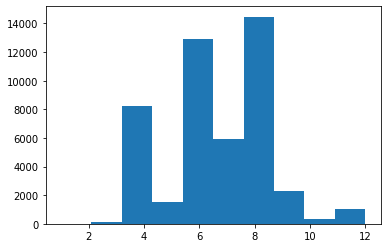

In [77]:
plt.hist(df.buildingqualitytypeid);


Tight sd around mean, roughly symmetrical, use mean

In [78]:
null_plans['buildingqualitytypeid'] = 'mean'


In [79]:
bath_bed_df = df[['bathroomcnt','bedroomcnt','calculatedbathnbr']] 
bath_bed_df

,bathroomcnt,bedroomcnt,calculatedbathnbr
0,3.50,4.00,3.50
1,1.00,2.00,1.00
2,2.00,3.00,2.00
3,3.00,4.00,3.00
4,3.00,3.00,3.00
...,...,...,...
77570,3.00,3.00,3.00
77571,2.00,2.00,2.00
77572,2.00,4.00,2.00
77573,1.00,3.00,1.00


In [80]:
bath_bed_df['diff']=bath_bed_df.bathroomcnt-bath_bed_df.calculatedbathnbr

In [81]:
bath_bed_df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,diff
count,73366.00,73366.00,73335.00,73335.00
mean,2.29,3.03,2.29,0.00
std,0.95,1.00,0.95,0.00
min,0.00,1.00,1.00,0.00
25%,2.00,2.00,2.00,0.00
50%,2.00,3.00,2.00,0.00
75%,3.00,4.00,3.00,0.00
max,13.00,11.00,13.00,0.00


In [92]:
print(df.bathroomcnt.isna().sum())
print(df.calculatedbathnbr.isna().sum())


0
31


No difference between calculated bathroom bumber and bathroom count, but more nulls in `calculatedbathnbr` column, so can drop that columns

In [166]:
null_plans['calculatedbathnbr'] = 'drop_column'


In [94]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


In [95]:
# Calculated SF

area_df = df[['calculatedfinishedsquarefeet','finishedsquarefeet12']] 
area_df['difference']=area_df.calculatedfinishedsquarefeet-area_df.finishedsquarefeet12
area_df.describe()

,calculatedfinishedsquarefeet,finishedsquarefeet12,difference
count,73356.00,73163.00,73163.00
mean,1762.81,1764.24,0.00
std,931.02,931.16,0.00
min,152.00,152.00,0.00
25%,1174.00,1175.00,0.00
50%,1525.00,1527.00,0.00
75%,2078.00,2080.00,0.00
max,21929.00,21929.00,0.00


In [96]:
print(df.calculatedfinishedsquarefeet.isna().sum())
print(df.finishedsquarefeet12.isna().sum())

10
203


no difference between calculated and finished sf, but only 10 nulls in `calculatedfinishedsquarefeet` so dropp `finishedsquarefeet12`

In [165]:
null_plans['finishedsquarefeet12'] = 'drop_column'


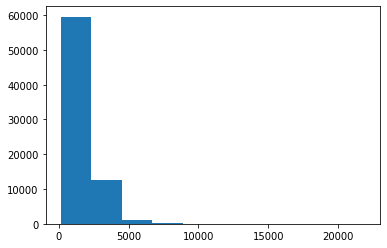

In [105]:
# calculatedfinishedsquarefeet sf
plt.hist(df.calculatedfinishedsquarefeet);

Positive skew, use median to impute

In [99]:
null_plans['calculatedfinishedsquarefeet'] = 'median'


In [100]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


In [101]:
# Full bath
print(df.fullbathcnt.isna().sum())


31


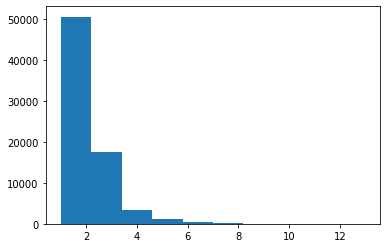

In [102]:
plt.hist(df.fullbathcnt);
plt.show();

In [103]:
null_plans['fullbathcnt'] = 'median'


In [106]:
df.heatingorsystemdesc.isna().sum()


25008

In [107]:
len(df.heatingorsystemdesc)

73366

In [108]:
# Percent missing
(df.heatingorsystemdesc.isna().sum()/len(df.heatingorsystemdesc))*100

34.086634135703186

In [109]:
df.heatingorsystemdesc.value_counts()


Central       33280
Floor/Wall    13249
Yes             850
Forced air      775
Solar           104
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

Probably have AC in CA, so missing != `0`, use mode for imputing.

In [110]:
null_plans['heatingorsystemtypeid'] = 'mode'
null_plans['heatingorsystemdesc'] = 'mode'

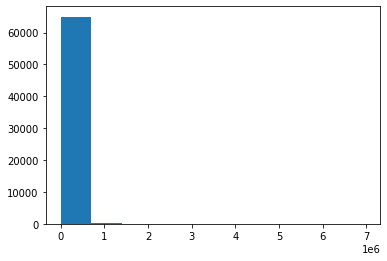

In [112]:
plt.hist(df.lotsizesquarefeet);


In [113]:
df.lotsizesquarefeet.describe()


count     65271.00
mean      30974.42
std      126163.39
min         236.00
25%        5774.00
50%        7283.00
75%       12292.50
max     6971010.00
Name: lotsizesquarefeet, dtype: float64

Huge deviation. Skewed data, use median

In [114]:
null_plans['lotsizesquarefeet'] = 'median'


In [116]:
df.propertyzoningdesc.isna().sum()


26308

In [117]:
(df.propertyzoningdesc.isna().sum()/len(df.propertyzoningdesc))*100

35.85857209061418

In [118]:
df.propertyzoningdesc.value_counts()

LAR1         6520
LAR3         2215
LARS         1392
LBR1N        1145
SCUR2         957
             ... 
HB M*           1
PRR1YY          1
WHR16OOO*       1
SFP*            1
BFA15000*       1
Name: propertyzoningdesc, Length: 1850, dtype: int64

In [125]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


In [198]:
import scipy

In [221]:
def describe_column(df, col):
    na_count =df[col].isna().sum()
    na_percent = (na_count/len(df[col]))*100
    skew = scipy.stats.skew(df[col], nan_policy='omit')
    kurt = scipy.stats.kurtosis(df[col], axis=0, fisher=True, bias=False, nan_policy='omit')
    print(f'Number of missing values: {na_count}')
    print(f'Percent values missing: {na_percent}')
    print()
    print('Summary Statistics:')
    print(df[col].describe())
    print()
    print('Value counts:')
    print(df[col].value_counts())
    print()
    print(f'Sample skew: {skew}')
    print(f'Sample kurtosis: {kurt}')
    plt.hist(df[col])
    plt.show()
    #sns.distplot(df, x=df.col)


In [210]:
df.dtypes

id                                int64
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64


In [211]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


<AxesSubplot:ylabel='Density'>

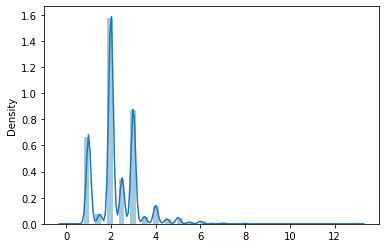

In [212]:
sns.distplot(df, x=df.bathroomcnt)

In [213]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


Number of missing values: 26572
Percent values missing: 36.21841179838072

Summary Statistics:
count   46794.00
mean        6.63
std         1.69
min         1.00
25%         6.00
50%         7.00
75%         8.00
max        12.00
Name: buildingqualitytypeid, dtype: float64

Value counts:
8.00     14472
6.00     12894
4.00      8236
7.00      5915
9.00      2263
5.00      1500
11.00      926
10.00      308
3.00       152
12.00      115
1.00        10
2.00         3
Name: buildingqualitytypeid, dtype: int64

Sample skew: 0.016141013224138922
Sample kurtosis: -0.27496119873518277


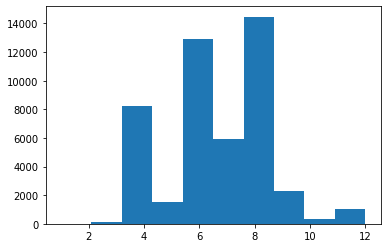

AttributeError: 'DataFrame' object has no attribute 'col'

In [220]:
describe_column(df,'buildingqualitytypeid')

tight deviation about mean, roughly normal, use mean

In [197]:
null_plans['buildingqualitytypeid'] = 'mean'


In [154]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


Number of missing values: 0
Percent values missing: 0.0

Value counts:
count   73366.00
mean     2016.00
std         0.00
min      2016.00
25%      2016.00
50%      2016.00
75%      2016.00
max      2016.00
Name: assessmentyear, dtype: float64
2016.00    73366
Name: assessmentyear, dtype: int64


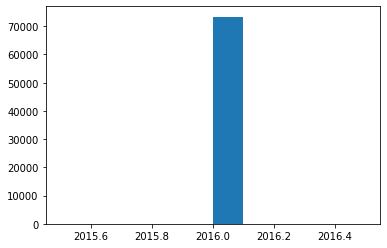

In [156]:
describe_column(df, 'assessmentyear')

nothing missing

In [157]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


Number of missing values: 1
Percent values missing: 0.0013630291960853801

Value counts:
count      73365.00
mean      300413.56
std       460664.38
min          161.00
25%        84749.00
50%       204154.00
75%       367681.00
max     22335500.00
Name: landtaxvaluedollarcnt, dtype: float64
21299.00     96
22755.00     65
30210.00     63
16522.00     54
18611.00     52
             ..
235759.00     1
112890.00     1
51551.00      1
90211.00      1
283704.00     1
Name: landtaxvaluedollarcnt, Length: 50052, dtype: int64


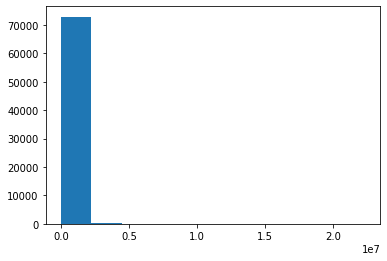

In [158]:
describe_column(df, 'landtaxvaluedollarcnt')

just one missing record, drop row

In [159]:
null_plans['buildingqualitytypeid'] = 'drop_row'


In [160]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


Number of missing values: 215
Percent values missing: 0.2930512771583567

Value counts:
count             73151.00
mean     60498136248437.49
std       1575572684793.98
min      60371011101000.00
25%      60374006022010.00
50%      60376209013002.00
75%      60590423323000.00
max     483030105084015.00
Name: censustractandblock, dtype: float64
60371371031000.00    60
60372766032001.00    51
60590320582009.00    44
60379203391054.00    41
60590626102134.00    41
                     ..
60379006092007.00     1
61110014022000.00     1
60375719004007.00     1
60371034001005.00     1
60375034021020.00     1
Name: censustractandblock, Length: 36744, dtype: int64


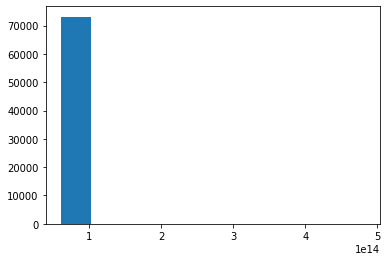

In [161]:
describe_column(df, 'censustractandblock')

Small number of values, drop

In [162]:
null_plans['censustractandblock'] = 'drop_row'


Number of missing values: 26308
Percent values missing: 35.85857209061418

Value counts:
count     47058
unique     1850
top        LAR1
freq       6520
Name: propertyzoningdesc, dtype: object
LAR1         6520
LAR3         2215
LARS         1392
LBR1N        1145
SCUR2         957
             ... 
HB M*           1
PRR1YY          1
WHR16OOO*       1
SFP*            1
BFA15000*       1
Name: propertyzoningdesc, Length: 1850, dtype: int64


TypeError: '<=' not supported between instances of 'float' and 'str'

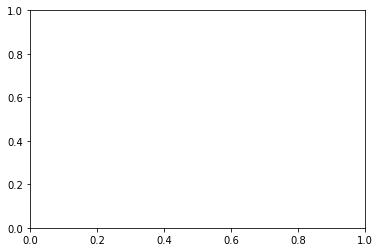

In [163]:
describe_column(df, 'propertyzoningdesc')

Lots of categorical info. Many missing. Would have to one-hot encode, but way too many - drop columns

In [164]:
null_plans['propertyzoningdesc'] = 'drop_column'


Number of missing values: 1437
Percent values missing: 1.9586729547746915

Value counts:
count    71929.00
mean     33462.25
std      46027.06
min       3491.00
25%      12447.00
50%      25218.00
75%      45457.00
max     396556.00
Name: regionidcity, dtype: float64
12447.00     16321
46298.00      2306
54311.00      1881
5534.00       1874
52650.00      1664
             ...  
118880.00        5
10815.00         4
13311.00         4
36078.00         1
21395.00         1
Name: regionidcity, Length: 175, dtype: int64


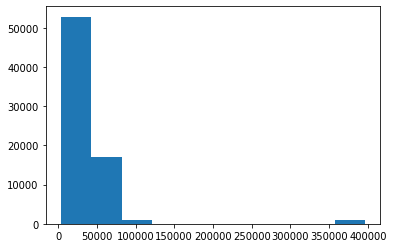

In [167]:
describe_column(df, 'regionidcity')

Categorical, we have other columns giving us location info, drop column

In [168]:
null_plans['regionidcity'] = 'drop_column'


Number of missing values: 0
Percent values missing: 0.0

Value counts:
count   73366.00
mean        1.54
std         2.87
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: roomcnt, dtype: float64
0.00     56123
6.00      4438
7.00      3820
5.00      2897
8.00      2867
4.00      1312
9.00      1193
10.00      340
3.00       207
11.00      108
12.00       34
13.00       10
2.00         9
14.00        6
1.00         1
15.00        1
Name: roomcnt, dtype: int64


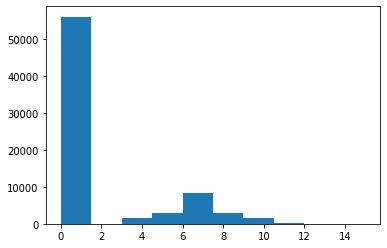

In [169]:
describe_column(df, 'roomcnt')

In [170]:
df.roomcnt.value_counts()

0.00     56123
6.00      4438
7.00      3820
5.00      2897
8.00      2867
4.00      1312
9.00      1193
10.00      340
3.00       207
11.00      108
12.00       34
13.00       10
2.00         9
14.00        6
1.00         1
15.00        1
Name: roomcnt, dtype: int64

Lots of 0s for roomcount. Doesn't make sense. Drop column.

In [192]:
null_plans['roomcnt'] = 'drop_column'


Number of missing values: 26255
Percent values missing: 35.78633154322166

Value counts:
count   47111.00
mean        1.00
std         0.00
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: unitcnt, dtype: float64
1.00    47111
Name: unitcnt, dtype: int64


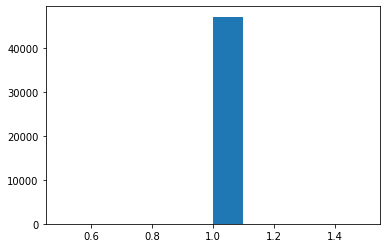

In [173]:
describe_column(df, 'unitcnt')

We got rid of all properties where this value != 1, so it can be dropped

In [194]:
null_plans['unitcnt'] = 'drop_column'


Number of missing values: 41
Percent values missing: 0.055884197039500594

Value counts:
count   73325.00
mean     1969.81
std        23.10
min      1878.00
25%      1954.00
50%      1971.00
75%      1987.00
max      2016.00
Name: yearbuilt, dtype: float64
1955.00    1914
1989.00    1776
1950.00    1609
1964.00    1549
1954.00    1537
           ... 
1889.00       1
1878.00       1
1882.00       1
1894.00       1
1880.00       1
Name: yearbuilt, Length: 133, dtype: int64


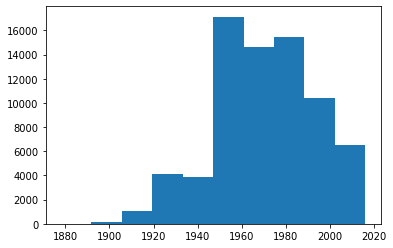

In [175]:
describe_column(df, 'yearbuilt')

In [176]:
null_plans['yearbuilt'] = 'mean'


Number of missing values: 75
Percent values missing: 0.10222718970640352

Value counts:
count     73291.00
mean     189713.19
std      226300.94
min          44.00
25%       84405.50
50%      136690.00
75%      219007.50
max     9164901.00
Name: structuretaxvaluedollarcnt, dtype: float64
100000.00    70
90000.00     51
200000.00    50
95000.00     47
110000.00    41
             ..
59544.00      1
155056.00     1
250803.00     1
457363.00     1
32797.00      1
Name: structuretaxvaluedollarcnt, Length: 48882, dtype: int64


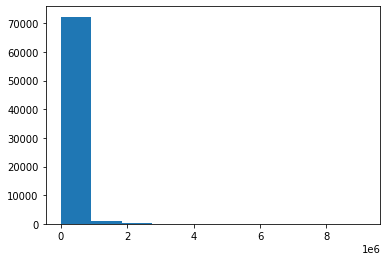

In [177]:
describe_column(df, 'structuretaxvaluedollarcnt')

In [178]:
null_plans['structuretaxvaluedollarcnt'] = 'median'


Number of missing values: 1
Percent values missing: 0.0013630291960853801

Value counts:
count      73365.00
mean      489935.40
std       629374.91
min         1000.00
25%       206900.00
50%       360000.00
75%       569542.00
max     25381250.00
Name: taxvaluedollarcnt, dtype: float64
450000.00    44
400000.00    44
350000.00    43
455000.00    42
375000.00    41
             ..
442715.00     1
199700.00     1
116825.00     1
163558.00     1
49546.00      1
Name: taxvaluedollarcnt, Length: 48741, dtype: int64


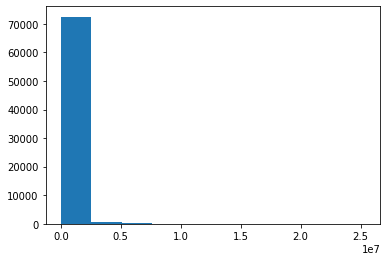

In [179]:
describe_column(df, 'taxvaluedollarcnt')

In [180]:
null_plans['taxvaluedollarcnt'] = 'median'


Number of missing values: 1
Percent values missing: 0.0013630291960853801

Value counts:
count      73365.00
mean      300413.56
std       460664.38
min          161.00
25%        84749.00
50%       204154.00
75%       367681.00
max     22335500.00
Name: landtaxvaluedollarcnt, dtype: float64
21299.00     96
22755.00     65
30210.00     63
16522.00     54
18611.00     52
             ..
235759.00     1
112890.00     1
51551.00      1
90211.00      1
283704.00     1
Name: landtaxvaluedollarcnt, Length: 50052, dtype: int64


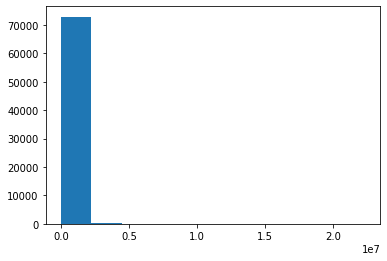

In [181]:
describe_column(df, 'landtaxvaluedollarcnt')

In [182]:
null_plans['landtaxvaluedollarcnt'] = 'median'

Number of missing values: 5
Percent values missing: 0.006815145980426901

Value counts:
count    73361.00
mean      5984.10
std       7325.29
min         19.92
25%       2712.06
50%       4449.85
75%       6921.66
max     290998.06
Name: taxamount, dtype: float64
2418.22     8
3720.52     7
2217.31     5
4401.72     5
1725.20     5
           ..
6713.74     1
1752.62     1
3675.10     1
19038.41    1
6317.15     1
Name: taxamount, Length: 69972, dtype: int64


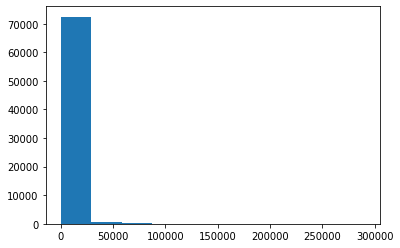

In [183]:
describe_column(df, 'taxamount')

In [184]:
null_plans['taxamount'] = 'median'


In [185]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential,36,0.51
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential,33,0.47
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential,34,0.49
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential,32,0.46
4,1970746,10887214,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,...,2016.00,45726.00,1533.89,60371236012000.00,0.01,2017-01-01,Central,Condominium,29,0.41


Number of missing values: 0
Percent values missing: 0.0

Value counts:
count   73366.00
mean        0.02
std         0.17
min        -4.66
25%        -0.02
50%         0.01
75%         0.04
max         5.26
Name: logerror, dtype: float64
0.00     7
0.00     7
0.00     5
0.01     5
0.01     5
        ..
0.09     1
-0.03    1
0.02     1
0.22     1
0.04     1
Name: logerror, Length: 72845, dtype: int64


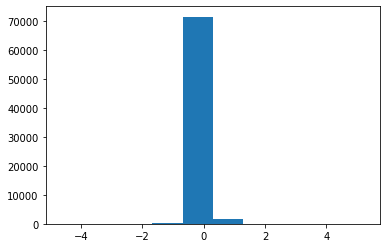

In [186]:
describe_column(df, 'logerror')

In [187]:
df.dtypes

id                                int64
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64


Number of missing values: 0
Percent values missing: 0.0

Value counts:
count      73366.00
mean    60492406.78
std       204336.33
min     60371011.10
25%     60374006.02
50%     60376209.01
75%     60590423.32
max     61110091.00
Name: rawcensustractandblock, dtype: float64
60590626.10    60
60371371.03    60
60379203.39    58
60372766.03    51
60590320.58    43
               ..
60590753.02     1
60375518.00     1
60372190.20     1
60379006.09     1
60375034.02     1
Name: rawcensustractandblock, Length: 36914, dtype: int64


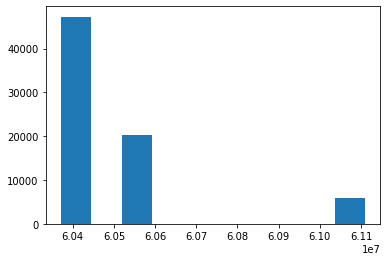

In [189]:
describe_column(df, 'rawcensustractandblock')

The calculated columns, `null_count` and `pct_col_missing` were useful for this step, but don't have predictive value for our model so they can be dropped

In [190]:
null_plans['null_count'] = 'drop_column'
null_plans['pct_col_missing'] = 'drop_column'

In [195]:
null_plans

{'buildingqualitytypeid': 'drop_row',
 'calculatedbathnbr': 'drop_column',
 'finishedsquarefeet12': 'drop_column',
 'calculatedfinishedsquarefeet': 'median',
 'fullbathcnt': 'median',
 'heatingorsystemtypeid': 'mode',
 'heatingorsystemdesc': 'mode',
 'lotsizesquarefeet': 'median',
 'censustractandblock': 'drop_row',
 'propertyzoningdesc': 'drop_column',
 'regionidcity': 'drop_column',
 'roomcnt': 'drop_column',
 'unitcnt': 'drop_column',
 'yearbuilt': 'mean',
 'structuretaxvaluedollarcnt': 'median',
 'taxvaluedollarcnt': 'median',
 'landtaxvaluedollarcnt': 'median',
 'taxamount': 'median',
 'null_count': 'drop_column',
 'pct_col_missing': 'drop_column'}

---


<h4 id="wrangle_zillowpy">wrangle_zillow.py</h4>
<p>Functions of the work above needed to acquire and prepare a new sample of data. </p>


---


<h3 id="mall-customers">Mall Customers</h3>
<h4 id="notebook">notebook</h4>
<ol>
<li>Acquire data from mall_customers.customers in mysql database. </li>




2. Summarize data (include distributions and descriptive statistics).</li>



3. Detect outliers using IQR.</li>



4. Split data (train, validate, and test split).</li>



5. Encode categorical columns using a one hot encoder (pd.get_dummies).</li>



6. Handles missing values.</li>



7. Scaling</li>



---


</ol>
<h4 id="wrangle_mallpy">wrangle_mall.py</h4>



<ol>
<li>Acquire data from mall_customers.customers in mysql database. </li>



2. Split the data into train, validate, and split</li>


3. One-hot-encoding (pd.get_dummies)</li>



4. Missing values</li>



5. Scaling</li>
</ol>